# Probability
## Module 1 - Experiment

In [1]:
from probability.experiment import Experiment, Occurrence

experiment = Experiment('Coin')
experiment

Series([], dtype: float64)

In [2]:
experiment.register(Occurrence('head'))
experiment.register(Occurrence('tails'))

experiment

Coin
head     1
tails    1
dtype: int64

In [3]:
experiment = Experiment('Coin')

experiment.register(Occurrence('head', 2))
experiment.register(Occurrence('tails', 7))
experiment.register(Occurrence('head'))

experiment.calcule()

Coin
head     3/10
tails    7/10
dtype: object

In [4]:
experiment = Experiment('Coin', 'Ball')

experiment.register(Occurrence(['head', 'red'], 5))
experiment.register(Occurrence(['tails', 'blue']))
experiment.register(Occurrence(['tails', 'yellow'], 2))
experiment.register(Occurrence(['head', 'blue'], 2))

experiment.calcule()

Coin   Ball  
head   blue       1/5
       red        1/2
tails  blue      1/10
       yellow     1/5
dtype: object

## Event and counter

In [5]:
from collections import Counter

lorem_ipsum = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc tincidunt, erat ut ultrices scelerisque, ex tortor sagittis nulla, feugiat fermentum dolor nisl sit amet arcu. Pellentesque tincidunt luctus augue, a suscipit tortor porttitor sed. Sed lacinia felis non ante sagittis, non auctor turpis mollis. In tincidunt tincidunt justo. Phasellus sed sapien ultricies, malesuada neque id, facilisis arcu. Sed volutpat nisl in iaculis varius. Donec porttitor tellus non sem volutpat, convallis ullamcorper magna vehicula. Proin dapibus risus ac erat pretium imperdiet. Vivamus mattis magna quis sem pellentesque ullamcorper. Morbi eget lorem eu ante condimentum pretium sollicitudin sit amet tortor. In eget tristique felis, sit amet tincidunt eros. Phasellus auctor id dolor a pellentesque. Nullam et eros dignissim, commodo libero vitae, malesuada purus. Cras tincidunt urna quis erat sagittis, sed porta turpis porta. Vestibulum quam nunc, aliquam aliquam ipsum quis, fermentum aliquet eros. Donec ut lorem ac dui rhoncus scelerisque."
counter = Counter(lorem_ipsum.lower())
counter

Counter({' ': 147,
         ',': 15,
         '.': 17,
         'a': 63,
         'b': 4,
         'c': 37,
         'd': 28,
         'e': 83,
         'f': 6,
         'g': 11,
         'h': 4,
         'i': 90,
         'j': 1,
         'l': 55,
         'm': 38,
         'n': 53,
         'o': 48,
         'p': 26,
         'q': 14,
         'r': 54,
         's': 73,
         't': 85,
         'u': 73,
         'v': 9,
         'x': 1})

In [6]:
experiment = Experiment.from_counter(counter, 'Letter')

experiment.calcule()

Letter
      49/345
,       1/69
.    17/1035
a      7/115
b     4/1035
c    37/1035
d    28/1035
e    83/1035
f      2/345
g    11/1035
h     4/1035
i       2/23
j     1/1035
l     11/207
m    38/1035
n    53/1035
o     16/345
p    26/1035
q    14/1035
r      6/115
s    73/1035
t     17/207
u    73/1035
v      1/115
x     1/1035
dtype: object

## Module 2 - Probability Distribution

### From experiment

In [7]:
from probability.probability_distribution import ProbabilityDistribution

P = ProbabilityDistribution.from_experiment(experiment)
P

Letter
      49/345
,       1/69
.    17/1035
a      7/115
b     4/1035
c    37/1035
d    28/1035
e    83/1035
f      2/345
g    11/1035
h     4/1035
i       2/23
j     1/1035
l     11/207
m    38/1035
n    53/1035
o     16/345
p    26/1035
q    14/1035
r      6/115
s    73/1035
t     17/207
u    73/1035
v      1/115
x     1/1035
dtype: object

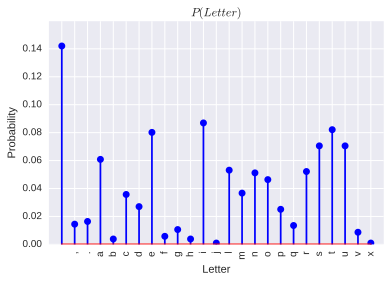

In [8]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'


P.plot().show()

### From joint distribution

In [9]:
import pandas as pd

distribution = [
    ['low',  'easy', 'A', 0.126],
    ['low',  'easy', 'B', 0.168],
    ['low',  'easy', 'C', 0.126],
    ['low',  'hard', 'A', 0.009],
    ['low',  'hard', 'B', 0.045],
    ['low',  'hard', 'C', 0.126],
    ['high', 'easy', 'A', 0.252],
    ['high', 'easy', 'B', 0.0224],
    ['high', 'easy', 'C', 0.0056],
    ['high', 'hard', 'A', 0.06],
    ['high', 'hard', 'B', 0.036],
    ['high', 'hard', 'C', 0.0024],
]

variables = ['Intelligence', 'Course Difficulty', 'Grade', 'probability']

distribution = [
    ['low',  'A', 0.07],
    ['low',  'B', 0.28],
    ['low',  'C', 0.35],
    ['high', 'A', 0.18],
    ['high', 'B', 0.09],
    ['high', 'C', 0.03],
]

variables = ['Intelligence', 'Grade', 'probability']

P = ProbabilityDistribution.from_joint_distribution(pd.DataFrame(distribution, columns=variables))
P.series

Intelligence  Grade
high          A        0.18
              B        0.09
              C        0.03
low           A        0.07
              B        0.28
              C        0.35
Name: probability, dtype: float64

### Probability Distribution attributes

In [10]:
P.variables

Intelligence, Grade

### Probability Distribution operations

#### $P(∅) = 0$

In [11]:
P()

0

#### Marginalization

Marginalize out a Random Variable from joint distribution

* Example:

 Marginalize out $Grade$ from joint distribution $P(Intelligence, Grade)$:
 
 $$\sum_i P(Intelligence, Grade=grade_i) = P(Intelligence)$$
 

In [12]:
Intelligence, Grade = P.variables
P.marginalize_out(Grade)

Intelligence
high    3/10
low     7/10
Name: P(Intelligence), dtype: object

#### Marginal distribution

* $P(X)$

In [13]:
P(Intelligence)

Intelligence
high    3/10
low     7/10
Name: P(Intelligence), dtype: object

* **Event:** $P(Grade ∈ \{A, B\})$

In [14]:
α = {'A', 'B'}

P(Grade==α)  # or P(Grade=={'A', 'B'})

Grade
B    37/100
A       1/4
Name: P(Grade), dtype: object

* **Variable:** $P(Intelligence=low)$ where $Intelligence$ is a variable

In [15]:
P(Intelligence=='low')

Intelligence
low    7/10
Name: P(Intelligence), dtype: object

* **Variable:** $P(low)$ as a shorthand for $P(X=x)$

In [16]:
P('low')

Intelligence
low    7/10
Name: P(Intelligence), dtype: object

#### Union

$P(α ∪ β) = P(α) + P(β) − P(α ∩ β)$

where (alternative notation)

* $P(α ∪ β) ≡ P(α\ or\ β)$
* $P(α ∩ β) ≡ P(α, β)$


If $α, β ∈ S$ and $α ∩ β = ∅$, then $P (α ∪ β) = P (α) + P (β)$.

In [17]:
#α = Event({'high'})
#β = Event({'A', 'B'})

#P(α.union(β))

#### Intersection

* $P ((X = x) ∩ (Y = y))$

In [18]:
#P((Intelligence=='high').intersection(Grade=='B'))

 *  $P(X=x, Y=y)$

In [19]:
P(Intelligence=='high', Grade=='B')

Intelligence  Grade
high          B        9/100
Name: P(Intelligence, Grade), dtype: object

 * or just $P(x, y)$

In [20]:
P('high', 'B')

Intelligence  Grade
high          B        9/100
Name: P(Intelligence, Grade), dtype: object

* Language alternative

#### Joint distribution

* $P(X, Y)$ where $X$ and $Y$ are variables

In [21]:
P(Intelligence, Grade)

Intelligence  Grade
high          A         9/50
              B        9/100
              C        3/100
low           A        7/100
              B         7/25
              C         7/20
Name: P(Intelligence, Grade), dtype: object

* Language alternative

In [22]:
P.joint_distribution(Intelligence, Grade)

Intelligence  Grade
high          A         9/50
              B        9/100
              C        3/100
low           A        7/100
              B         7/25
              C         7/20
Name: P(Intelligence, Grade), dtype: object

#### Conditional Probability

* $P(Y\ |\ X)$: Conditional probability joint distribution

In [23]:
P(Intelligence | Grade)

Intelligence  Grade
high          A        18/25
              B         9/37
              C         3/38
low           A         7/25
              B        28/37
              C        35/38
Name: P(Intelligence | Grade), dtype: object

* $P(Y\ |\ X=x)$: Conditional probability joint distribution

In [24]:
# P(Intelligence | (Grade=='A'))  # Doesn't works yet
P(Intelligence | Grade).series[:, 'A']

Intelligence
high    0.72
low     0.28
Name: P(Intelligence | Grade), dtype: float64

* $P(Y=y\ |\ X=x)$: Probability value

In [25]:
#P((Intelligence=='high') | (Grade=='A'))  # Doesn't works yet
P(Intelligence | Grade).series['high', 'A']

0.71999999999999997

In [35]:
P2 = P(Intelligence | Grade)
P2(Intelligence=='high', Grade=='A')

TypeError: 'ConditionalDistribution' object is not callable

#### Independence

We say that an event $α$ is independent of event $β$ in $P$, denoted $P |= (α ⊥ β)$, if $P(α\ |\ β) =
P(α)$ or if $P(β) = 0$.

In [33]:
#P((Intelligence=='high') | (Grade=='A')) == P(Intelligence=='high') or P(Grade=='A') == 0

#### Expectation

Let $X$ be a discrete random variable that **takes numerical values**; then the expectation of $X$
under the _distribution $P$_ is

$$\mathbb{E}_P[X] = \sum_{x} x · P(x)$$

In [ ]:
#Coin = {1: 'head', 2: 'tail'}

P_c = ProbabilityDistribution.from_joint_distribution(pd.DataFrame([
    [1, 1, 1/12],
    [1, 2, 1/12],
    [1, 3, 1/12],
    [1, 4, 1/12],
    [1, 5, 1/12],
    [1, 6, 1/12],
    [2, 1, 1/12],
    [2, 2, 1/12],
    [2, 3, 1/12],
    [2, 4, 1/12],
    [2, 5, 1/12],
    [2, 6, 1/12],
], columns=['Coin', 'Die', 'probability']))

Coin, Die = P_c.variables

E = P_c.E
E[Die]

##### Properties of the expectation of a random variable.

1. Constant
$$\mathbb{E}[c] = c$$

In [ ]:
c = 42
E[c] == c

that causes
$$\mathbb{E}[\mathbb{E}[X]] = \mathbb{E}[X]$$

In [ ]:
E[E[Die]] == E[Die]

1. The expectation of a random variable is a _linear function_ in that random variable. Thus,
$$\mathbb{E} [a · X + b] = a\mathbb{E} [X] + b$$

In [ ]:
a = 2
b = 3

#E[a * Die + b]

2. Linearity of expectation: $\mathbb{E}[X + Y] = \mathbb{E}[X] + \mathbb{E}[Y]$

In [ ]:
print('E[Die] =', E[Die])
print('E[Coin] =', E[Coin])
print('E[Die] + E[Coin] =', E[Die] + E[Coin])
print()
#print('E[Die + Coin] == E[Die] + E[Coin]?', E[Die + Coin] == E[Die] + E[Coin])  # Doesn't works yet

3. If $X$ and $Y$ are independent, then
$\mathbb{E}[X · Y] = \mathbb{E}[X] · \mathbb{E}[Y]$

4. $\mathbb{E}_P[X\ |\ Y = y] = \mathbb{E}_P[X\ |\ y] = \sum_{x} x · P(x\ |\ y)$

#### Variance

$$\mathbb{V}ar_P[X] = \mathbb{E}_P[(X - \mathbb{E}_P[X])^2]$$
$$\mathbb{V}ar[X] = \mathbb{E}[X]^2 - (\mathbb{E}_P[X])^2$$

1. If X and Y are independent, then
$$\mathbb{V}ar[X + Y] = \mathbb{V}ar[X] + \mathbb{V}ar[Y]$$
2. The variance scales as a quadratic function of $X$:
$$\mathbb{V}ar[a · X + b] = a^2\mathbb{V}[X]$$

3. Standard deviation

$$\sigma = \sqrt {\mathbb{V}ar[X]}$$

## Module 3 - Graphs

In [ ]:
P.plot()

In [ ]:
P(Grade, Intelligence).plot()

In [ ]:
axes = P(Intelligence | Grade).plot()
axes.set_title('$P(Intelligence\ |\ Grade)$')

In [ ]:
P(Grade).plot.pie()

In [ ]:
P(Grade).plot.bar()

In [ ]:
P(Intelligence, Grade).to_dataframe().plot.bar(stacked=True)